<a href="https://colab.research.google.com/github/sonakshisharan/Machine_Learning/blob/main/Random_Forests_and_Gradient_Boosted_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_decision_forests
!pip install tf_keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 62.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

import tensorflow_decision_forests as tfdf
import numpy as np
import pandas as pd
import tensorflow as tf
import tf_keras
import math

In [ ]:
dataset_df = pd.read_excel("/content/drive/MyDrive/ml dataset/Data-RF.xlsx")
dataset_df.head(3)

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,A
1,15.00,24,67.0,Female,High,A
2,5.25,24,45.0,Male,High,B-


In [ ]:
label = "Grade"

classes = dataset_df[label].unique().tolist()
print(f"Label classes: {classes}")

dataset_df[label] = dataset_df[label].map(classes.index)

Label classes: ['A', 'B-', 'C-', 'D', 'B', 'A-', 'C', 'E']


In [ ]:
def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

352 examples in training, 148 examples for testing.


In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [ ]:
model_1 = tfdf.keras.RandomForestModel(verbose=2, categorical_algorithm="CART", num_trees=10, max_depth=16)
model_1.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmpgyuj9o48 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.

Training dataset read in 0:00:00.332422. Found 352 examples.
Training model...


[INFO 24-02-22 05:57:36.1287 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-22 05:57:36.1288 UTC kernel.cc:772] Collect training examples
[INFO 24-02-22 05:57:36.1288 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-22 05:57:36.1289 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-22 05:57:36.1289 UTC kernel.cc:392] Number of examples: 352
[INFO 24-02-22 05:57:36.1290 UTC data_spec_inference.cc:305] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-22 05:57:36.1291 UTC kernel.cc:792] Tra

Model trained in 0:00:00.071799
Compiling model...


Model compiled.


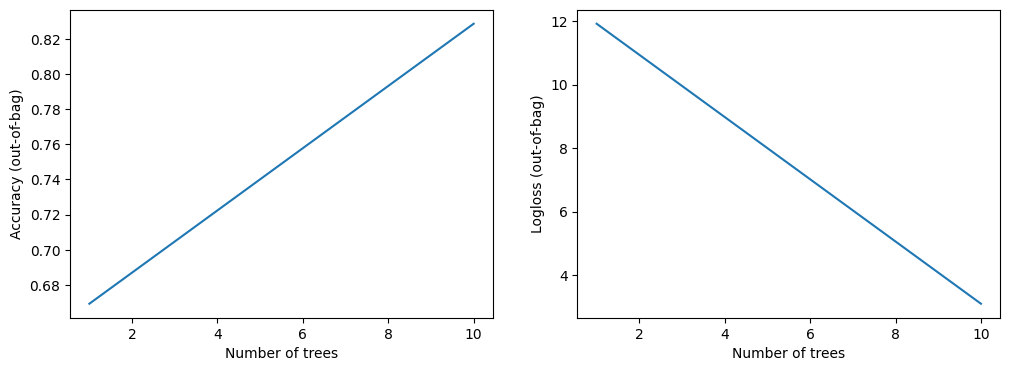

In [ ]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [ ]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 7s 7s/step - loss: 0.0000e+00 - accuracy: 0.8108

loss: 0.0000
accuracy: 0.8108


In [ ]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=1, max_depth=3)

In [ ]:
model_1 = tfdf.keras.RandomForestModel(verbose=2, categorical_algorithm="CART", num_trees=30, max_depth=16)
model_1.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmpiiprvwa0 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.

[INFO 24-02-22 05:31:10.9613 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-22 05:31:10.9613 UTC kernel.cc:772] Collect training examples
[INFO 24-02-22 05:31:10.9614 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-22 05:31:10.9615 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-22 05:31:10.9615 UTC kernel.cc:392] Number of examples: 352
[INFO 24-02-22 05:31:10.9616 UTC data_spec_inference.cc:305] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-22 05:31:10.9616 UTC kernel.cc:792] Tra

Model trained in 0:00:00.102706
Compiling model...
Model compiled.


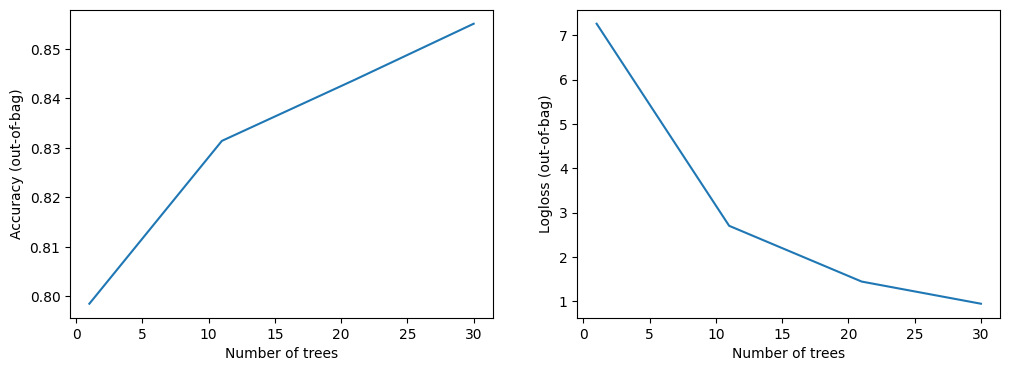

In [ ]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

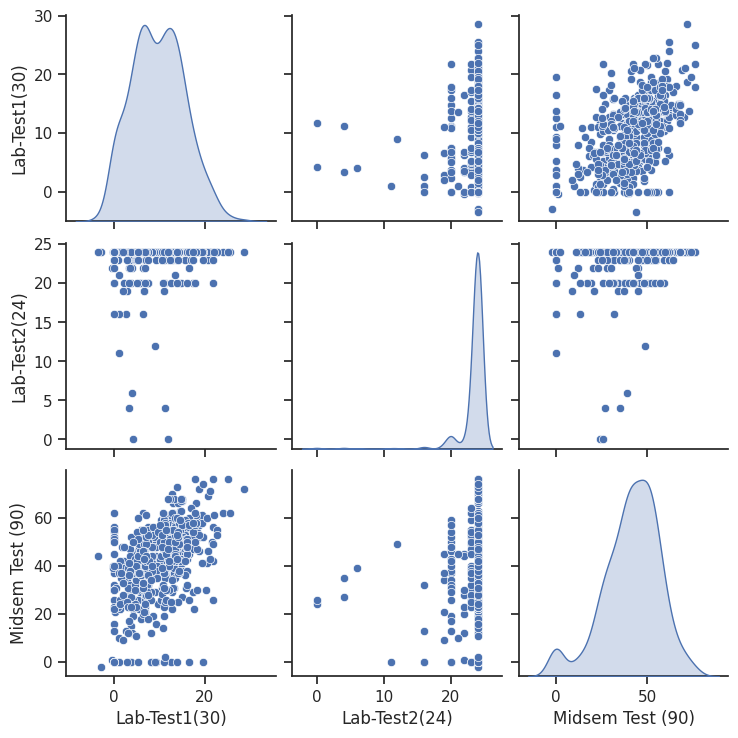

In [ ]:
import seaborn as sns
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/ml dataset/Data-RF.xlsx')

sns.set(style="ticks", color_codes=True)
sns.pairplot(df, diag_kind='kde')
plt.show()

In [ ]:
modelg = tfdf.keras.GradientBoostedTreesModel()
modelg.fit(tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label='Grade'))

Use /tmp/tmp3r61zj38 as temporary training directory


Reading training dataset...
Training dataset read in 0:00:00.204924. Found 352 examples.
Training model...
Model trained in 0:00:00.713938
Compiling model...
Model compiled.


In [ ]:
modelg.compile(metrics=["accuracy"])
evaluation = modelg.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 272ms/step - loss: 0.0000e+00 - accuracy: 0.8716

loss: 0.0000
accuracy: 0.8716


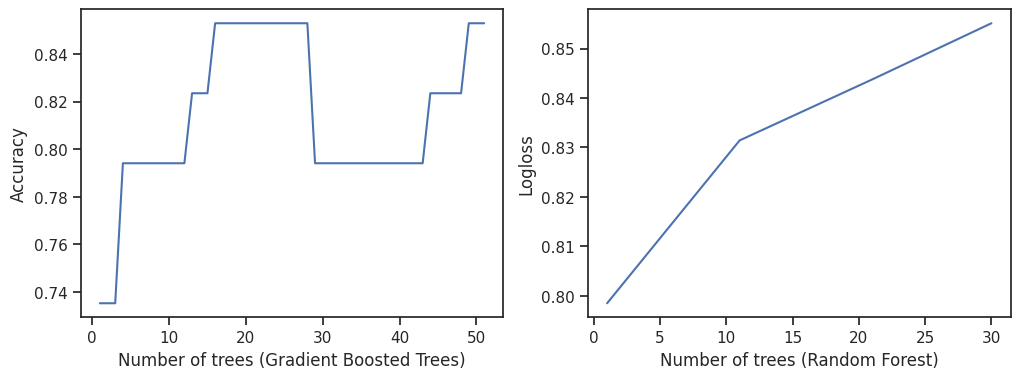

In [ ]:
logsg = modelg.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logsg], [log.evaluation.accuracy for log in logsg])
plt.xlabel("Number of trees (Gradient Boosted Trees)")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees (Random Forest)")
plt.ylabel("Logloss")

plt.show()

In [ ]:
tuner = tfdf.tuner.RandomSearch(num_trials=20)
model = tfdf.keras.RandomForestModel(tuner=tuner)
model.fit(train_ds)

Use /tmp/tmpxat9wjzo as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.212588. Found 352 examples.
Training model...
Model trained in 0:00:00.265768
Compiling model...
Model compiled.


In [ ]:
model.summary()

Model: "random_forest_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (5):
	Attendance
	Gender
	Lab-Test1(30)
	Lab-Test2(24)
	Midsem_Test_(90)

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "Midsem_Test_(90)"  0.778405 ################
    2.    "Lab-Test1(30)"  0.374467 #####
    3.    "Lab-Test2(24)"  0.164907 
    4.       "Attendance"  0.159974 
    5.           "Gender"  0.159255 

Variable Importance: NUM_AS_ROOT:
    1. "Midsem_Test_(90)" 233.000000 ################
    2.    "Lab-Test1(30)" 67.000000 

Variable Importance: NUM_NODES:
    1. "Midsem_Test_(90)" 4526.000000 ################
    2.    "Lab-Test1(30)" 3959.000000 #############
